In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-handwritten-characters-dataset/english.csv
/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
/kaggle/input/english-handwritten-characters-dataset/Img/img051-027.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-049.png
/kaggle/input/english-handwritten-characters-dataset/Img/img011-047.png
/kaggle/input/english-handwritten-characters-dataset/Img/img038-026.png
/kaggle/input/english-handwritten-characters-dataset/Img/img021-042.png
/kaggle/input/english-handwritten-characters-dataset/Img/img057-036.png
/kaggle/input/english-handwritten-characters-dataset/Img/img049-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img023-054.png
/kaggle/input/english-handwritten-characters-dataset/Img/img019-004.png
/kaggle/input/english-handwritten-characters-dataset/Img/img017-016.png
/kaggle/input/english-handwritten-characters-dataset/Img/img036-015.png

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Reshape, Conv2D, BatchNormalization, UpSampling2D

import os
import shutil

In [5]:
df= pd.read_csv("/kaggle/input/english-handwritten-characters-dataset/english.csv")

In [6]:
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [7]:
df.isna().sum().sum(),df.duplicated().sum()

(0, 0)

In [8]:
df["label"].value_counts()

label
0    55
1    55
2    55
3    55
4    55
     ..
v    55
w    55
x    55
y    55
z    55
Name: count, Length: 62, dtype: int64

In [11]:
images = df["image"]
output=[]
for path in images:

    image = Image.open("/kaggle/input/english-handwritten-characters-dataset/"+path)
    image = image.convert("L")
    image = image.resize((500,500))
    image = np.array(image)
    output.append(image)

image_data = np.array(output) # Replace with your actual image data
image_data = image_data/255.0

print(image_data.shape)

(3410, 500, 500)


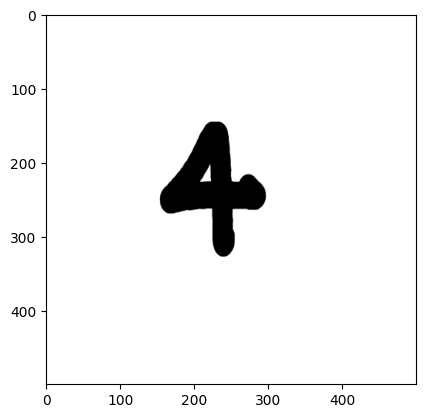

In [14]:
plt.gray()
plt.imshow(image_data[250])

In [15]:
text_data = df["label"]

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True,lower=False)
tokenizer.fit_on_texts(text_data)

# Convert text data to sequences
text_sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences for a consistent input size
max_text_length = max(len(seq) for seq in text_sequences)
padded_text_sequences = tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen=max_text_length)

In [16]:
len(tokenizer.word_index)

62

In [17]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50))
model.add(layers.LSTM(1024))
model.add(layers.Dense(500*500, activation='relu'))
model.add(layers.Reshape((500, 500, 1)))  # Assuming your output shape is 50x50
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(np.array(padded_text_sequences), image_data, epochs=300, batch_size=64)

Epoch 1/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - loss: 0.9145
Epoch 2/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.2512
Epoch 3/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0419
Epoch 4/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0411
Epoch 5/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0411
Epoch 6/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0414
Epoch 7/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0405
Epoch 8/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0408
Epoch 9/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0412
Epoch 10/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0416
Epoch 11/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0409
Epoch 12/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0414
Epoch 13/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0409
Epoch 14/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0408
Epoch 15/300
54/54 ━━━━━━━━━━

In [18]:
def delete_directory(directory_path):
    try:
        # Remove the contents of the directory
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                os.remove(file_path)
            for dir in dirs:
                dir_path = os.path.join(root, dir)
                os.rmdir(dir_path)

        # Now, remove the empty directory
        shutil.rmtree(directory_path)

        print(f"Directory '{directory_path}' already exists, '{directory_path}' deleted successfully.")
    except Exception as e:
            print("does not exists")

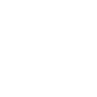

In [19]:
white_image = np.ones((500, 500)) * 255
fig,ax = plt.subplots(figsize = (1,1))
plt.axis('off')
plt.imshow(white_image,cmap='gray', vmin=0, vmax=255)
plt.show()

In [20]:
def get_out_image(text="Sample",figsize=(10,6),crop_size=(250,500)):

    mystr = text
    textlist = list(mystr)

    predicted_images=[]

    for new_text in textlist:
        if (new_text==" "):
            white_image = np.ones((500, 500))*249
            predicted_images.append(white_image)
        else:
            new_text_sequence = tokenizer.texts_to_sequences([new_text])
            predicted_image = model.predict(np.array(new_text_sequence),verbose=5)[0]
            predicted_image = predicted_image.reshape(500,500)
            predicted_images.append(predicted_image)

    directory_path = 'out_images'
    delete_directory(directory_path)

    import os
    os.mkdir("out_images")

    predicted_images = np.array(predicted_images)

    for new_text,image in zip(textlist,predicted_images):
        image_path = f"out_images/{new_text}.png"
        fig = plt.figure(figsize=(5,5))
        if (new_text==" "):
            fig.figimage(image,vmin=0,vmax=255)
        else:
            fig.figimage(image)
        plt.savefig(image_path)
        plt.close(fig)

    def center_crop(image, target_size):
        width, height = image.size
        left = (width - target_size[0]) // 2
        top = (height - target_size[1]) // 2
        right = (width + target_size[0]) // 2
        bottom = (height + target_size[1]) // 2
        return image.crop((left, top, right, bottom))

    def merge_images(image_list):
        # Assuming all images have the same size
        image_size = image_list[0].size
        merged_image = np.zeros((image_size[1], len(image_list) * image_size[0]))

        for i, image in enumerate(image_list):
            merged_image[:, i * image_size[0] : (i + 1) * image_size[0]] = np.array(image)

        return merged_image

    # Load images and center crop
    images = []
    for char in textlist:
        # Load image (replace 'path_to_images' with the actual path)
        image_path = f"out_images/{char}.png"
        img = Image.open(image_path).convert("L")  # Convert to grayscale
        cropped_img = center_crop(img, target_size=crop_size)  # Adjust the target size as needed
        images.append(cropped_img)

    # Merge images into a single numpy array
    merged_image_array = merge_images(images)

    # Display the thresholded merged image
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(merged_image_array, cmap="gray",vmin=0, vmax=255)
    ax.axis("off")
    plt.show()

Directory 'out_images' already exists, 'out_images' deleted successfully.


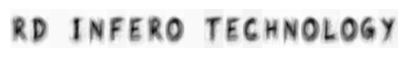

In [27]:
get_out_image("RD INFERO TECHNOLOGY",figsize=(5,6))

Directory 'out_images' already exists, 'out_images' deleted successfully.


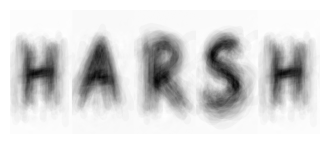

In [25]:
get_out_image("HARSH",figsize=(4,5))

Directory 'out_images' already exists, 'out_images' deleted successfully.


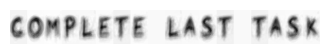

In [26]:
get_out_image("COMPLETE LAST TASK",figsize=(4,5))